In [1]:
import os

# Set environment variable for OpenMP runtime
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Now you can import torch and transformers
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

Using pad_token, but it is not set yet.


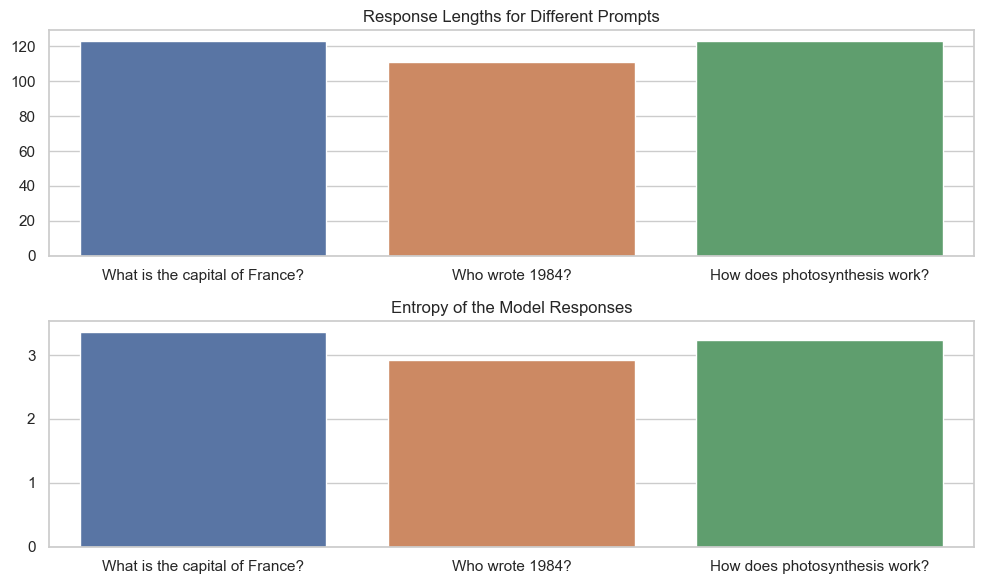

In [2]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the model and tokenizer
model_name = 'distilgpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Set the pad token if it's not already defined
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

model = GPT2LMHeadModel.from_pretrained(model_name).to(device)

# Generate response function with attention mask
def generate_response(prompt_text):
    encoded_input = tokenizer(prompt_text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    try:
        outputs = model.generate(input_ids, attention_mask=attention_mask, max_length=100, num_return_sequences=1, pad_token_id=tokenizer.eos_token_id)
        text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        return text
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Entropy calculation function
def calculate_entropy(text):
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids, attention_mask=attention_mask)
    loss = outputs.loss
    return loss.item()

prompts = ["What is the capital of France?", "Who wrote 1984?", "How does photosynthesis work?"]
responses = []
entropies = []
# Generate responses for each prompt
for prompt in prompts:
    response = generate_response(prompt)
    responses.append(response)
for response in responses:
    entropy = calculate_entropy(response)
    entropies.append(entropy)

# Plotting the results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Black-box results: Response length
plt.subplot(2, 1, 1)
sns.barplot(x=prompts, y=[len(resp) for resp in responses])
plt.title('Response Lengths for Different Prompts')

# White-box results: Entropy of the responses
plt.subplot(2, 1, 2)
sns.barplot(x=prompts, y=entropies)
plt.title('Entropy of the Model Responses')

plt.tight_layout()
plt.show()

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

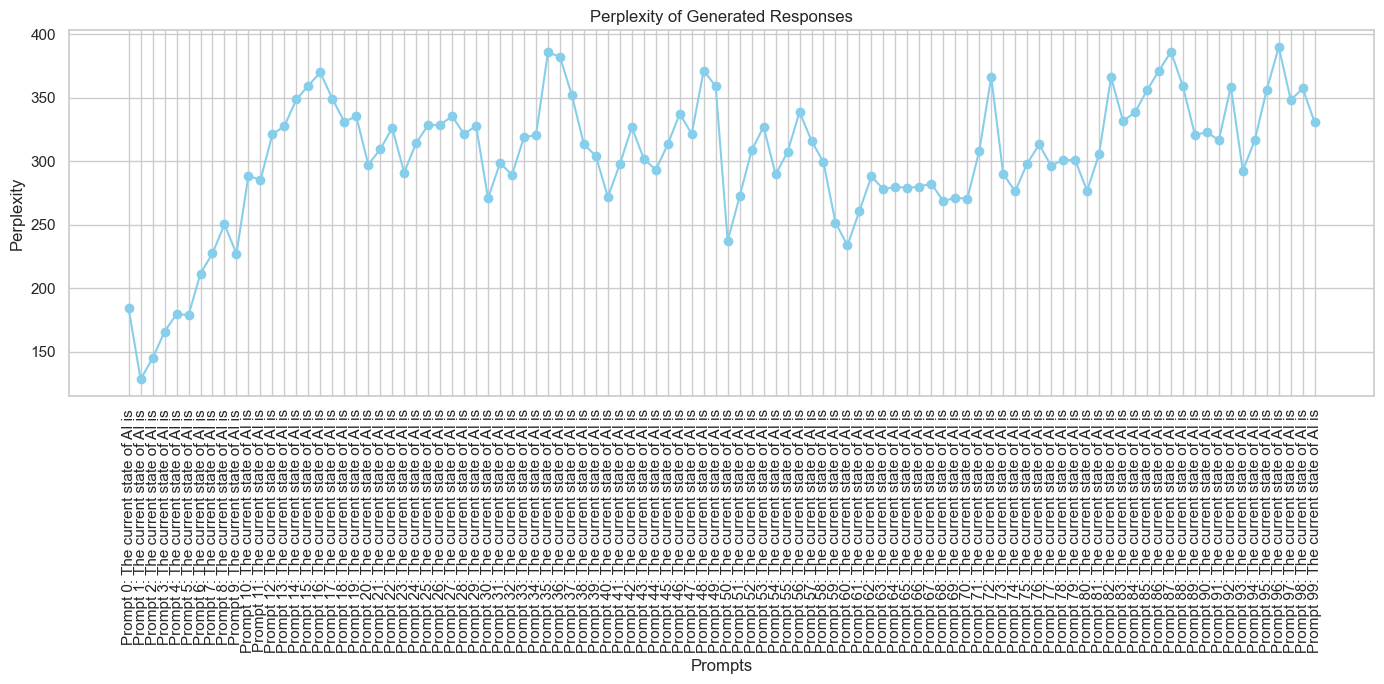

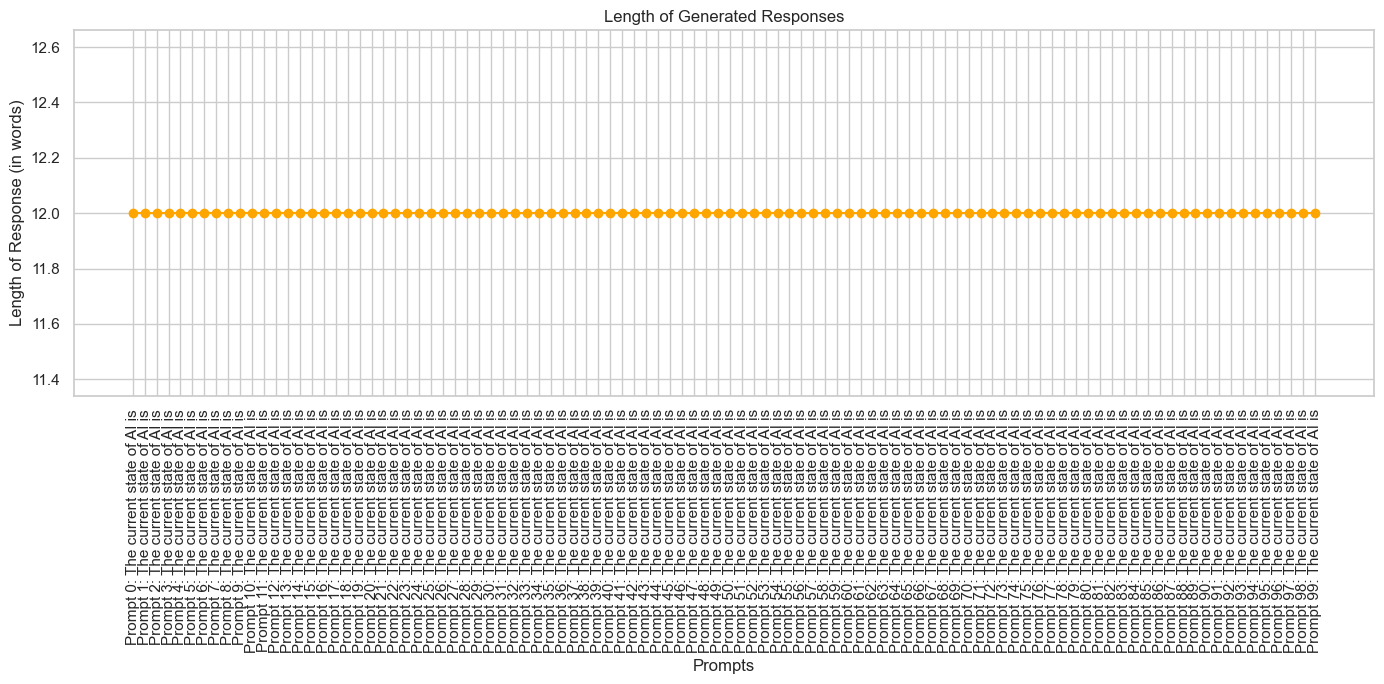

In [7]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the device and model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_name = 'distilgpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # Set pad_token
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)

# rest of your code...


# Function to generate a response and calculate perplexity
def generate_response_and_perplexity(prompt_text):
    # Tokenize and encode the prompt text
    encoded_input = tokenizer(prompt_text, return_tensors='pt', padding=True, truncation=True, max_length=1024).to(device)
    
    # Generate response
    output_sequences = model.generate(input_ids=encoded_input['input_ids'], attention_mask=encoded_input['attention_mask'], max_length=100)
    
    # Decode the output sequence to text
    generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
    
    # Calculate perplexity
    with torch.no_grad():
        outputs = model(**encoded_input, labels=encoded_input['input_ids'])
        loss = outputs.loss if outputs.loss is not None else torch.tensor(0)
    perplexity = torch.exp(loss).item()
    
    return generated_text, perplexity

# Generate responses and calculate perplexities for a range of prompts
prompts = [f"Prompt {i}: The current state of AI is" for i in range(100)]
responses = []
perplexities = []
lengths = []

for prompt in prompts:
    response, perplexity = generate_response_and_perplexity(prompt)
    response.replace(": The current state of AI is", '')
    responses.append(response)
    perplexities.append(perplexity)
    lengths.append(len(response.split()))

# Plot perplexity over responses
plt.figure(figsize=(14, 7))
plt.plot(prompts, perplexities, marker='o', color='skyblue')
plt.title('Perplexity of Generated Responses')
plt.xlabel('Prompts')
plt.ylabel('Perplexity')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot length of responses
plt.figure(figsize=(14, 7))
plt.plot(prompts, lengths, marker='o', color='orange')
plt.title('Length of Generated Responses')
plt.xlabel('Prompts')
plt.ylabel('Length of Response (in words)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import unittest

class TestModelFunctions(unittest.TestCase):
    def setUp(self):
        # Setting up before every test (commonly used test variables or states)
        self.prompt_text = "Test prompt: The current state of AI is"

    def test_generate_response_and_perplexity(self):
        # Testing if the function returns the expected types and perplexity range
        response, perplexity = generate_response_and_perplexity(self.prompt_text)
        self.assertIsInstance(response, str, "The response should be a string.")
        self.assertIsInstance(perplexity, float, "Perplexity should be a float.")
        self.assertGreater(perplexity, 1, "Perplexity should be greater than 1.")

unittest.main(argv=[''], exit=False) # This line replaces if __name__ == '__main__':


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
.
----------------------------------------------------------------------
Ran 1 test in 1.378s

OK


In [12]:
import unittest

class TestModelOutput(unittest.TestCase):
    def test_response_content(self):
        # Testing if the generated response contains certain expected phrases
        prompt_text = "Test prompt: The future of AI is"
        response, _ = generate_response_and_perplexity(prompt_text)
        self.assertIn("future of AI", response, "The response should discuss the future of AI.")

    def test_response_perplexity(self):
        # Testing if the perplexity falls within a plausible range for a known input
        prompt_text = "Test prompt: The future of AI is"
        _, perplexity = generate_response_and_perplexity(prompt_text)
        self.assertTrue(10 <= perplexity <= 50, "Perplexity should fall within a reasonable range.")

# Running the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
.Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
.Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
F
FAIL: test_response_perplexity (__main__.TestModelOutput)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\harsh\AppData\Local\Temp\ipykernel_16084\4187649925.py", line 14, in test_response_perplexity
    self.assertTrue(10 <= perplexity <= 50, "Perplexity should fall within a reasonable range.")
AssertionError: False is not true : Perplexity should fall within a reasonable range.

----------------------------------------------------------------------
Ran 3 tests in 3.396s

FAILED (failures=1)
